In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score)
from sklearn.model_selection import cross_val_score
import pickle
import time 

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

In [12]:
X_train = np.load('../data/processed_data/X_train_scaled.npy')
X_test = np.load('../data/processed_data/X_test_scaled.npy')
Y_train = np.load('../data/processed_data/Y_train.npy')
Y_test = np.load('../data/processed_data/Y_test.npy')

print("Data loaded successfully.")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Data loaded successfully.
Training set: (811, 6)
Testing set: (203, 6)


In [13]:
with open('../models/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

    with open('../models/risk_mapping.pkl', 'rb') as f:
        risk_mapping = pickle.load(f)

print(f"Features: {feature_names}")   
class_names = list(risk_mapping.keys())
print(f"Class names: {class_names}")

Features: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
Class names: ['low risk', 'mid risk', 'high risk']


In [14]:
models = {
    'LogisticRegression' : LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTree' : DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators = 100),
    'Support Vector Machine': SVC(random_state = 42 , probability = True , kernel = 'rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5) 

}
print("Models to Train:")
for name in models.keys():
    print(f" - {name}")

Models to Train:
 - LogisticRegression
 - DecisionTree
 - Random Forest
 - Support Vector Machine
 - K-Nearest Neighbors


In [15]:
results = []

print("=" * 80)
print("Training and Evaluating Models")
print("=" * 80)

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {name}")
    print(f"{'='*80}")

    start_time = time.time()
    model.fit(X_train, Y_train)
    train_time = time.time() - start_time

    Y_pred = model.predict(X_test)
    Y_pred_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred , average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    # ROC-AUC for multi-class
    try:
        roc_auc = roc_auc_score(Y_test, Y_pred_prob, multi_class='ovr', average='weighted')
    except:
        roc_auc = 0.0
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Print results
    print(f"Accuracy:   {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F1-Score:   {f1:.4f}")
    print(f"ROC-AUC:    {roc_auc:.4f}")
    print(f"CV Score:   {cv_mean:.4f} (+/- {cv_std:.4f})")
    print(f"Train Time: {train_time:.3f} seconds")
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Score': cv_mean,
        'CV Std': cv_std,
        'Train Time': train_time
    })

print("\n" + "="*80)
print("ALL MODELS TRAINED!")
print("="*80)


Training and Evaluating Models

Training: LogisticRegression
Accuracy:   0.6404
Precision:  0.6225
Recall:     0.6404
F1-Score:   0.6255
ROC-AUC:    0.8012
CV Score:   0.6128 (+/- 0.0182)
Train Time: 0.012 seconds

Training: DecisionTree
Accuracy:   0.7635
Precision:  0.7706
Recall:     0.7635
F1-Score:   0.7630
ROC-AUC:    0.8931
CV Score:   0.7743 (+/- 0.0188)
Train Time: 0.003 seconds

Training: Random Forest
Accuracy:   0.8522
Precision:  0.8520
Recall:     0.8522
F1-Score:   0.8514
ROC-AUC:    0.9554
CV Score:   0.8163 (+/- 0.0250)
Train Time: 0.107 seconds

Training: Support Vector Machine
Accuracy:   0.6946
Precision:  0.6837
Recall:     0.6946
F1-Score:   0.6732
ROC-AUC:    0.8273
CV Score:   0.6856 (+/- 0.0282)
Train Time: 0.065 seconds

Training: K-Nearest Neighbors
Accuracy:   0.6995
Precision:  0.7017
Recall:     0.6995
F1-Score:   0.6985
ROC-AUC:    0.8624
CV Score:   0.6721 (+/- 0.0363)
Train Time: 0.003 seconds

ALL MODELS TRAINED!


In [16]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by accuracy (descending)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)
results_df


MODEL COMPARISON RESULTS


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Score,CV Std,Train Time
2,Random Forest,0.852217,0.851994,0.852217,0.851440,0.955442,0.816292,0.024993,0.107430
1,DecisionTree,0.763547,0.770557,0.763547,0.763001,0.893059,0.774332,0.018788,0.003061
4,K-Nearest Neighbors,0.699507,0.701671,0.699507,0.698502,0.862384,0.672082,0.036346,0.002782
3,Support Vector Machine,0.694581,0.683702,0.694581,0.673200,0.827256,0.685571,0.028163,0.065130
0,LogisticRegression,0.640394,0.622492,0.640394,0.625452,0.801199,0.612815,0.018212,0.011960


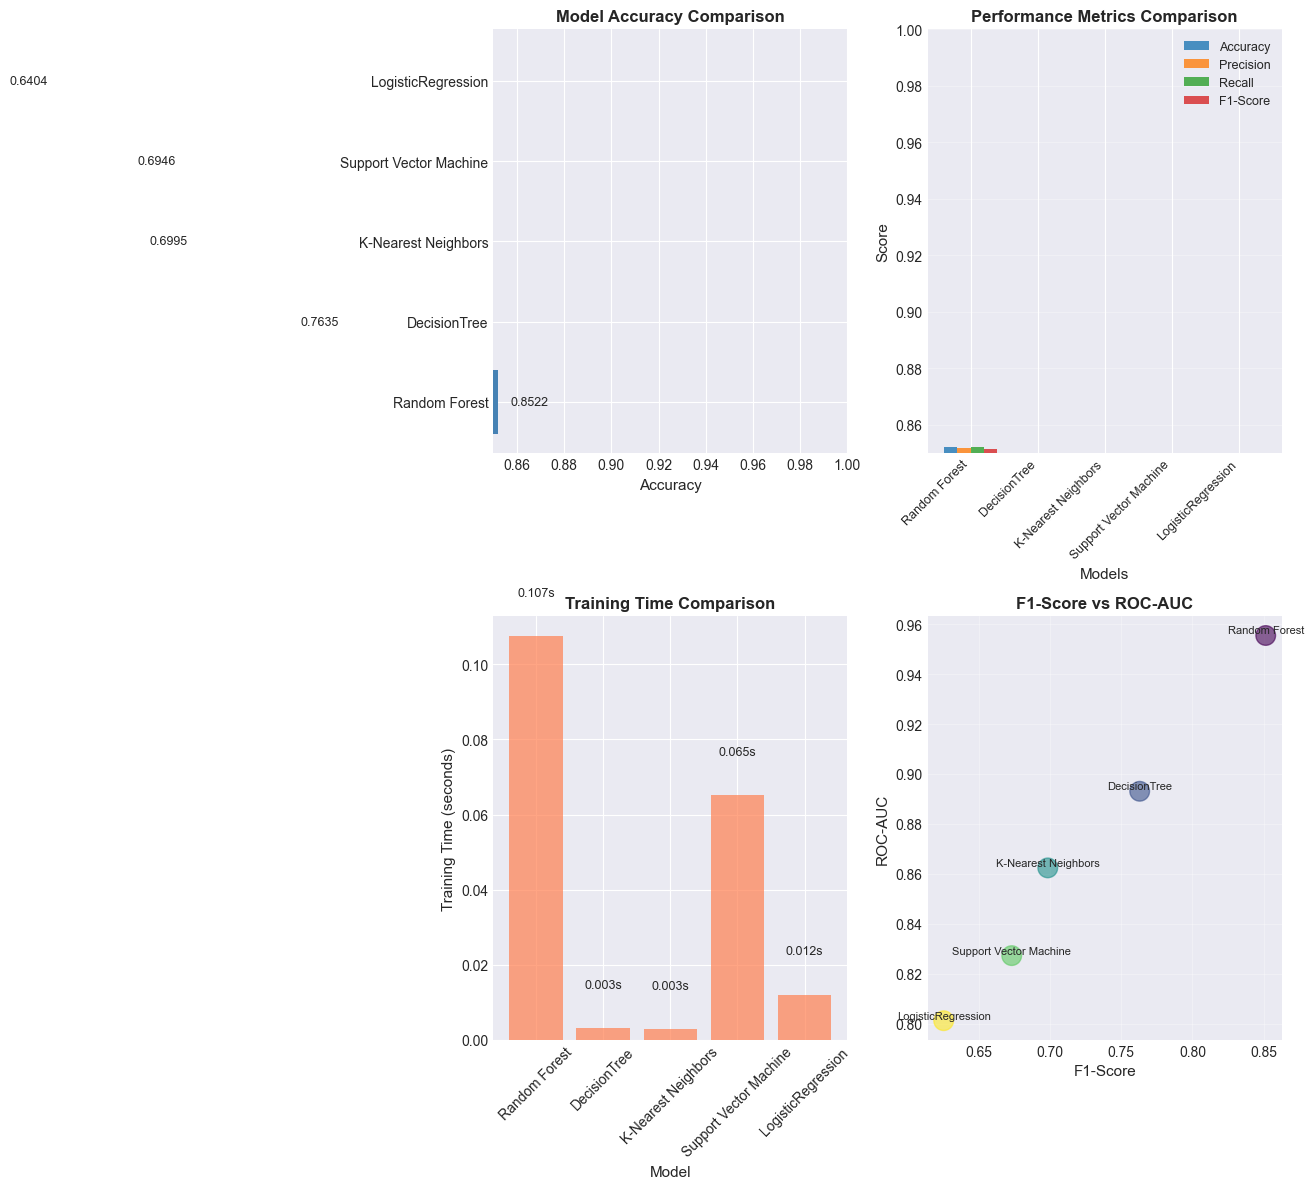

✅ Visualization saved!


In [17]:
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy Comparison
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim([0.85, 1.0])
for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

# 2. All Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[0, 1].bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

axes[0, 1].set_xlabel('Models', fontsize=11)
axes[0, 1].set_ylabel('Score', fontsize=11)
axes[0, 1].set_title('Performance Metrics Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x + width * 1.5)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right', fontsize=9)
axes[0, 1].legend(fontsize=9)
axes[0, 1].set_ylim([0.85, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Training Time Comparison
axes[1, 0].bar(results_df['Model'], results_df['Train Time'], color='coral', alpha=0.7)
axes[1, 0].set_xlabel('Model', fontsize=11)
axes[1, 0].set_ylabel('Training Time (seconds)', fontsize=11)
axes[1, 0].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Train Time']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}s', ha='center', va='bottom', fontsize=9)

# 4. F1-Score vs ROC-AUC
axes[1, 1].scatter(results_df['F1-Score'], results_df['ROC-AUC'], 
                   s=200, alpha=0.6, c=range(len(results_df)), cmap='viridis')
for i, txt in enumerate(results_df['Model']):
    axes[1, 1].annotate(txt, (results_df['F1-Score'].iloc[i], results_df['ROC-AUC'].iloc[i]),
                       fontsize=8, ha='center', va='bottom')
axes[1, 1].set_xlabel('F1-Score', fontsize=11)
axes[1, 1].set_ylabel('ROC-AUC', fontsize=11)
axes[1, 1].set_title('F1-Score vs ROC-AUC', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../output/visualizations/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved!")

In [18]:
# Get best model based on accuracy
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print("="*80)
print("🏆 BEST MODEL")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")
print("\nFull Metrics:")
print(results_df.iloc[0])

🏆 BEST MODEL
Model: Random Forest
Accuracy: 0.8522

Full Metrics:
Model         Random Forest
Accuracy           0.852217
Precision          0.851994
Recall             0.852217
F1-Score            0.85144
ROC-AUC            0.955442
CV Score           0.816292
CV Std             0.024993
Train Time          0.10743
Name: 2, dtype: object


In [19]:
# Get the best model from our dictionary
best_model = models[best_model_name]

# Retrain on full training data
print(f"Retraining {best_model_name} on full training data...")
best_model.fit(X_train, Y_train)

# Final predictions
y_pred_final = best_model.predict(X_test)
y_pred_proba_final = best_model.predict_proba(X_test)

print("Best model retrained!")

Retraining Random Forest on full training data...
Best model retrained!


In [20]:

print("DETAILED CLASSIFICATION REPORT - BEST MODEL")


report = classification_report(
    Y_test,
    y_pred_final,
    target_names=class_names,
    digits=4
)

print(report)


DETAILED CLASSIFICATION REPORT - BEST MODEL
              precision    recall  f1-score   support

    low risk     0.8684    0.8148    0.8408        81
    mid risk     0.7941    0.8060    0.8000        67
   high risk     0.8983    0.9636    0.9298        55

    accuracy                         0.8522       203
   macro avg     0.8536    0.8615    0.8569       203
weighted avg     0.8520    0.8522    0.8514       203



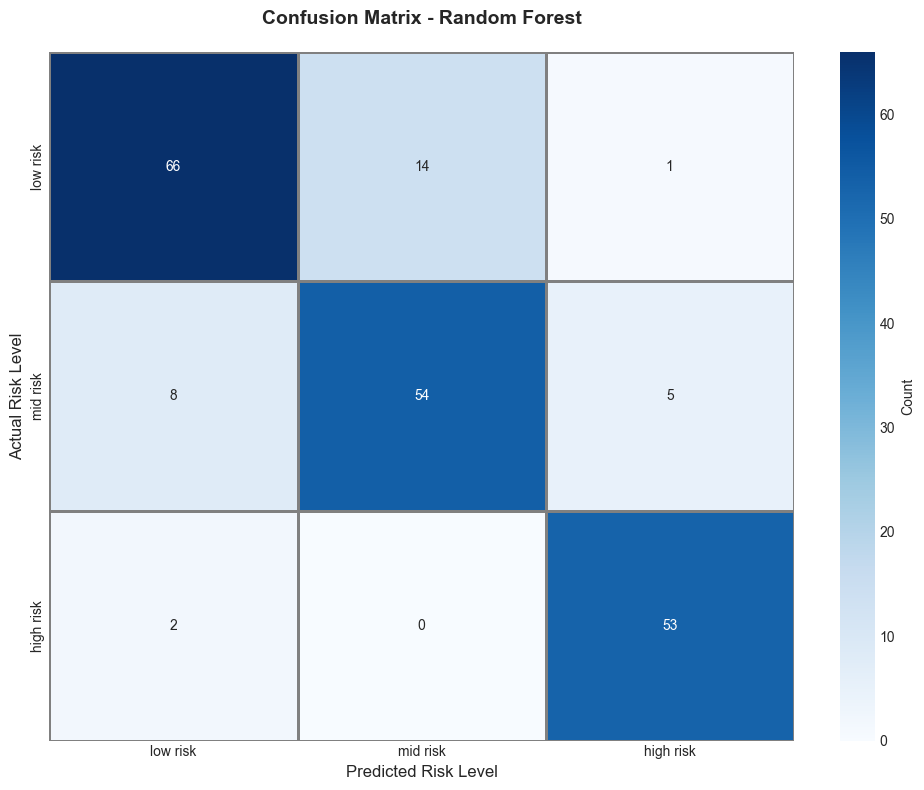

✅ Confusion matrix saved!


In [21]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_final)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            linewidths=1, linecolor='gray')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Actual Risk Level', fontsize=12)
plt.xlabel('Predicted Risk Level', fontsize=12)
plt.tight_layout()
plt.savefig('../output/visualizations/confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix saved!")

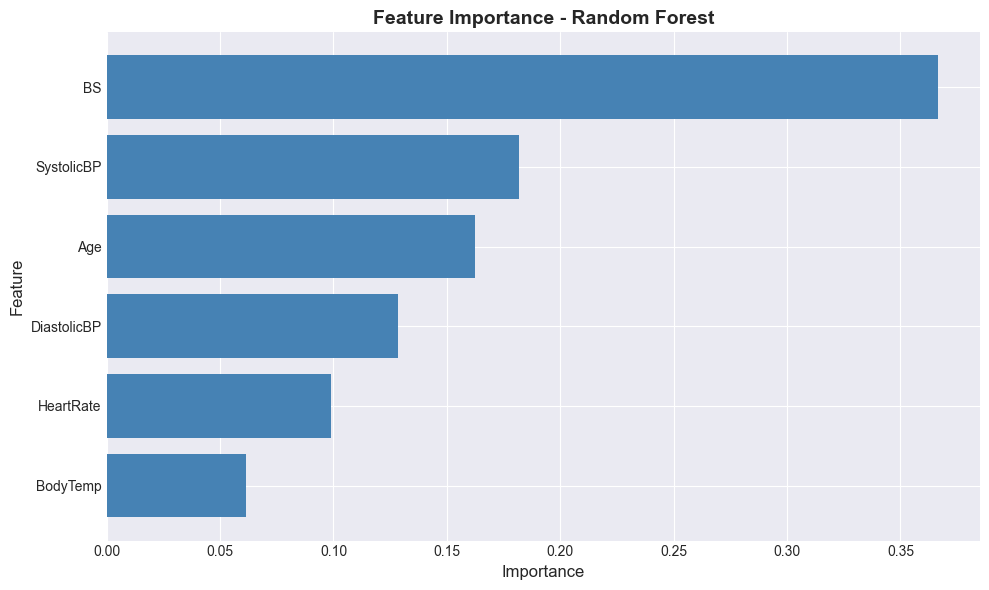


Top 5 Most Important Features:
       Feature  Importance
3           BS    0.366722
1   SystolicBP    0.181678
0          Age    0.162436
2  DiastolicBP    0.128506
5    HeartRate    0.099097


In [22]:
# Feature importance (works for tree-based models and logistic regression)
if best_model_name in ['Random Forest', 'Decision Tree']:
    # Tree-based models
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../output/visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())
    
elif best_model_name == 'Logistic Regression':
    # Logistic regression coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': np.abs(best_model.coef_[0])
    }).sort_values('Coefficient', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='coral')
    plt.xlabel('Absolute Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Feature Importance - Logistic Regression', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../output/visualizations/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())
else:
    print(f"Feature importance not available for {best_model_name}")

In [23]:
# Save the best model
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f" Best model ({best_model_name}) saved to: ../models/best_model.pkl")

 Best model (Random Forest) saved to: ../models/best_model.pkl


In [24]:
# Save results to CSV
results_df.to_csv('../output/model_comparison_results.csv', index=False)

print(" Results saved to: ../output/model_comparison_results.csv")

 Results saved to: ../output/model_comparison_results.csv


/var/folders/gk/5nkz3ms55qz9z1sd5mtjbxhh0000gn/T/ipykernel_4968/2234997725.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


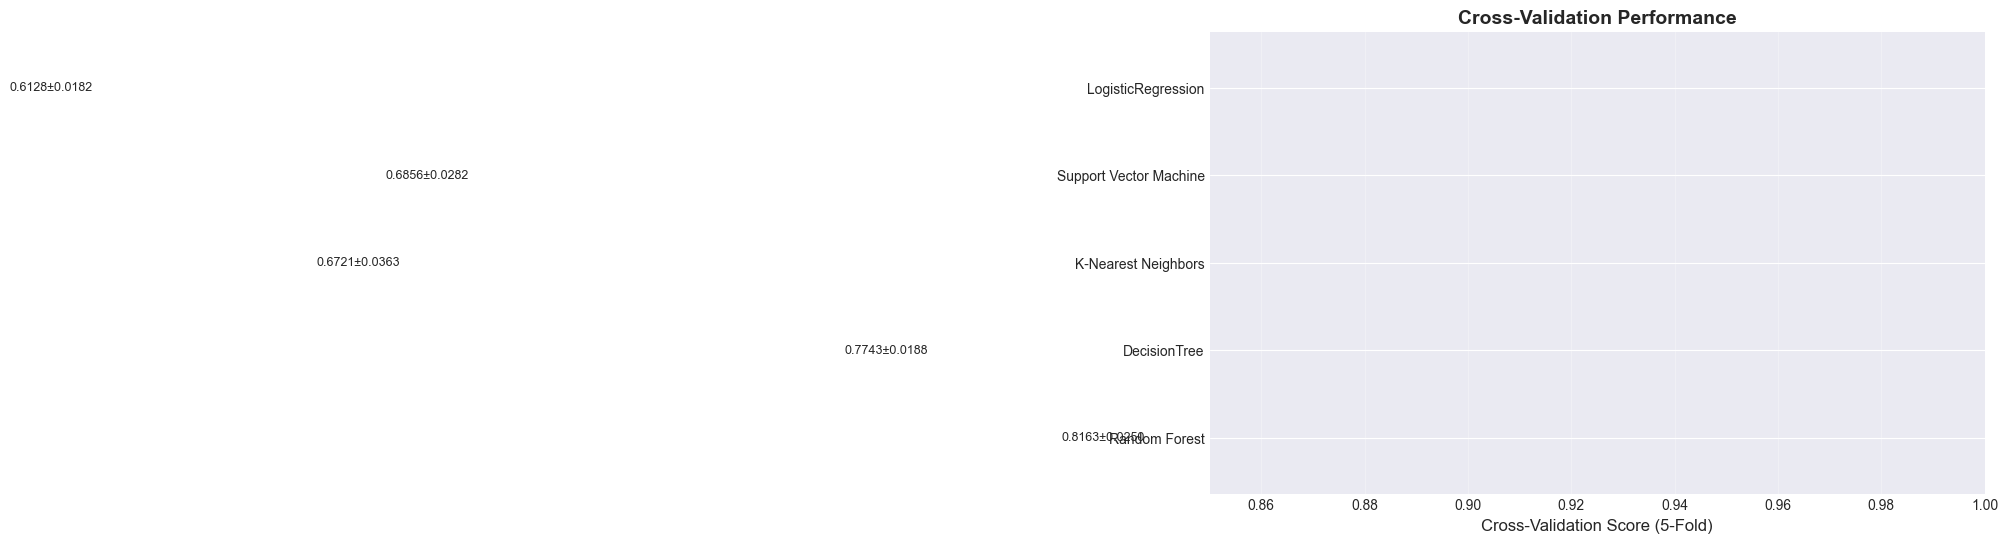

Cross-validation visualization saved!


In [26]:
# Visualize cross-validation scores
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CV scores with error bars
ax.barh(results_df['Model'], results_df['CV Score'], 
        xerr=results_df['CV Std'], capsize=5, 
        color='mediumseagreen', alpha=0.7)

ax.set_xlabel('Cross-Validation Score (5-Fold)', fontsize=12)
ax.set_title('Cross-Validation Performance', fontsize=14, fontweight='bold')
ax.set_xlim([0.85, 1.0])
ax.grid(axis='x', alpha=0.3)

# Add values
for i, (score, std) in enumerate(zip(results_df['CV Score'], results_df['CV Std'])):
    ax.text(score + 0.005, i, f'{score:.4f}±{std:.4f}', 
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../output/visualizations/cross_validation_scores.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cross-validation visualization saved!")

In [27]:
reverse_mapping = {v: k for k, v in risk_mapping.items()}


In [28]:
print("="*80)
print("SAMPLE PREDICTIONS (First 10 Test Samples)")
print("="*80)

predictions_sample = pd.DataFrame({
    'Actual': [reverse_mapping[y] for y in Y_test[:10]],
    'Predicted': [reverse_mapping[y] for y in y_pred_final[:10]],
    'Correct': Y_test[:10] == y_pred_final[:10]
})

predictions_sample


SAMPLE PREDICTIONS (First 10 Test Samples)


,Actual,Predicted,Correct
0,mid risk,mid risk,True
1,mid risk,mid risk,True
2,low risk,low risk,True
3,mid risk,mid risk,True
4,low risk,low risk,True
5,low risk,low risk,True
6,high risk,high risk,True
7,low risk,low risk,True
8,mid risk,mid risk,True
9,mid risk,mid risk,True


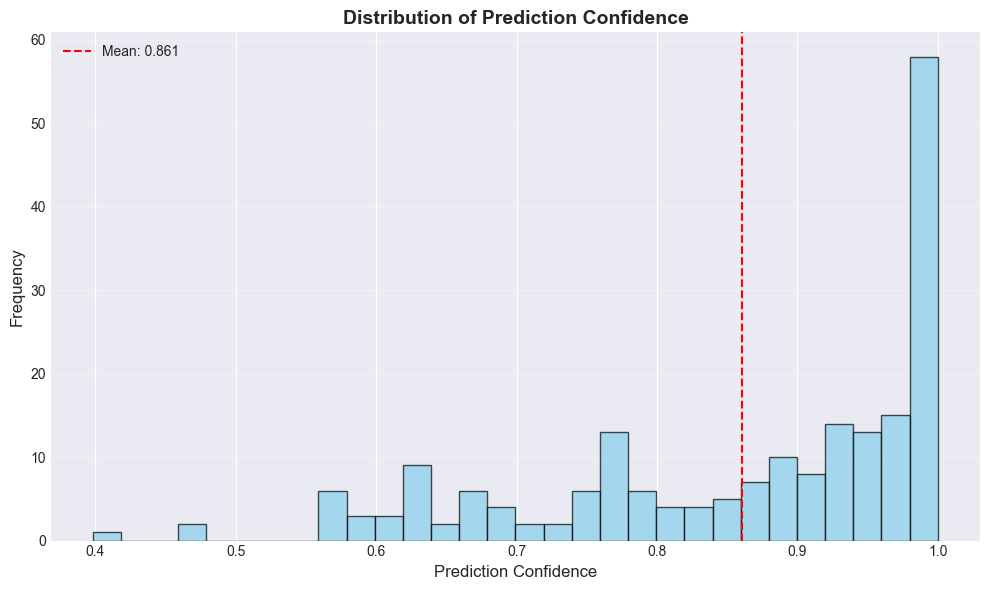

Mean Prediction Confidence: 0.8607
Min Confidence: 0.3985
Max Confidence: 1.0000


In [29]:
# Analyze prediction confidence
max_probas = y_pred_proba_final.max(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(max_probas, bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Confidence', fontsize=14, fontweight='bold')
plt.axvline(max_probas.mean(), color='red', linestyle='--', 
            label=f'Mean: {max_probas.mean():.3f}')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../output/visualizations/prediction_confidence.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean Prediction Confidence: {max_probas.mean():.4f}")
print(f"Min Confidence: {max_probas.min():.4f}")
print(f"Max Confidence: {max_probas.max():.4f}")